In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'C:\Users\WSEDR\Downloads\data_science.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
df.shape

(607, 12)

In [6]:
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [7]:
df.drop(['Unnamed: 0','salary'],axis=1 ,inplace=True)

In [8]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [9]:
df1=df.groupby('work_year')['salary_in_usd'].mean().round(2)
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

In [10]:
df1.index

Index([2020, 2021, 2022], dtype='int64', name='work_year')

In [11]:
df1.values

array([ 95813.  ,  99853.79, 124522.01])

In [12]:
data={
    'work_year':df1.index,
    'average_salary':df1.values
}
df1=pd.DataFrame(data)

df1

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [13]:
df1['average_salary']=(df1['average_salary']/1000).round(2)
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


<function matplotlib.pyplot.show(close=None, block=None)>

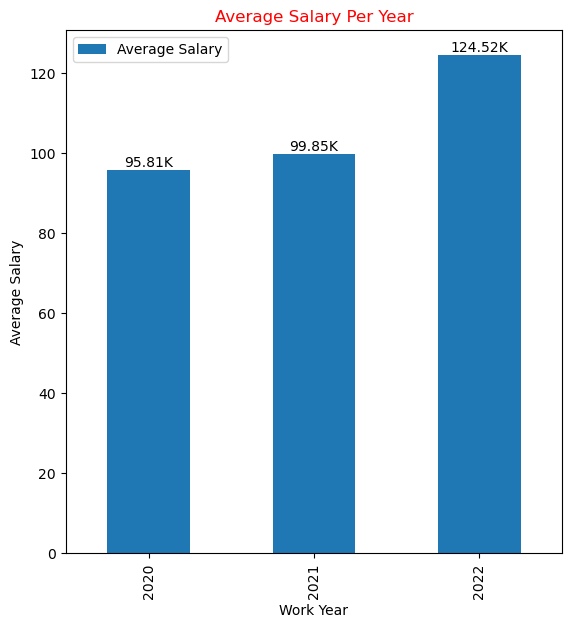

In [14]:
ax=df1.plot(kind='bar',x='work_year',y='average_salary',legend=True)
ax.bar_label(ax.containers[0],labels=df1['average_salary'].map('{:.2f}K'.format))
plt.subplots_adjust(top=1.2)
ax.legend(['Average Salary'],loc='upper left')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salary Per Year',color='red')
plt.show


In [15]:
df2=df.remote_ratio.value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [16]:
values=df2.to_list()

In [17]:
labels=['Fully Remote', 'No Remote','Partially Remote']

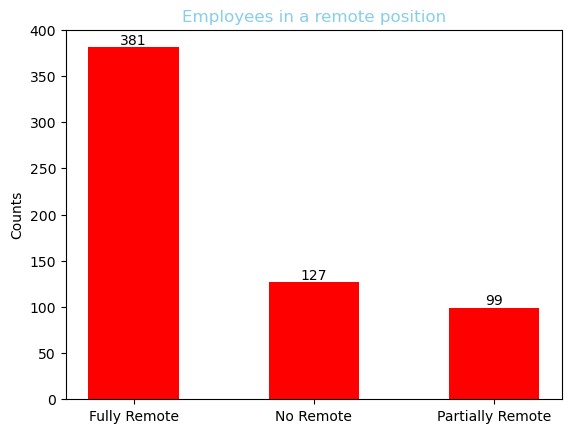

In [18]:
z=plt.bar(labels,values,width=0.5,color='red')
plt.bar_label(z,labels=values)
plt.title('Employees in a remote position',color='skyblue')
plt.ylabel('Counts')
plt.show()

In [19]:
df3=df.company_size.value_counts()
df3

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [20]:
df3.index.to_list()

['M', 'L', 'S']

In [21]:
values2=df3.values
values2

array([326, 198,  83], dtype=int64)

In [22]:
df3.to_list()

[326, 198, 83]

In [23]:
labels_for_company=['Medium','Large','Small']

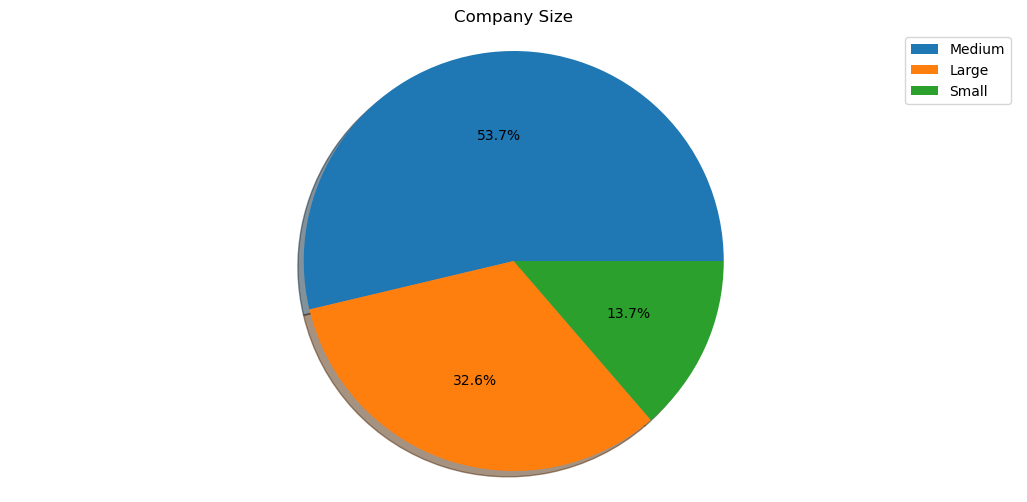

In [24]:
plt.figure(figsize=(13,6))
plt.pie(x=values2,labels=None,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.legend(labels=labels_for_company,loc='upper right')
plt.title('Company Size')
plt.show()

In [25]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [26]:
df4=df.job_title.value_counts()[:5]
df4

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

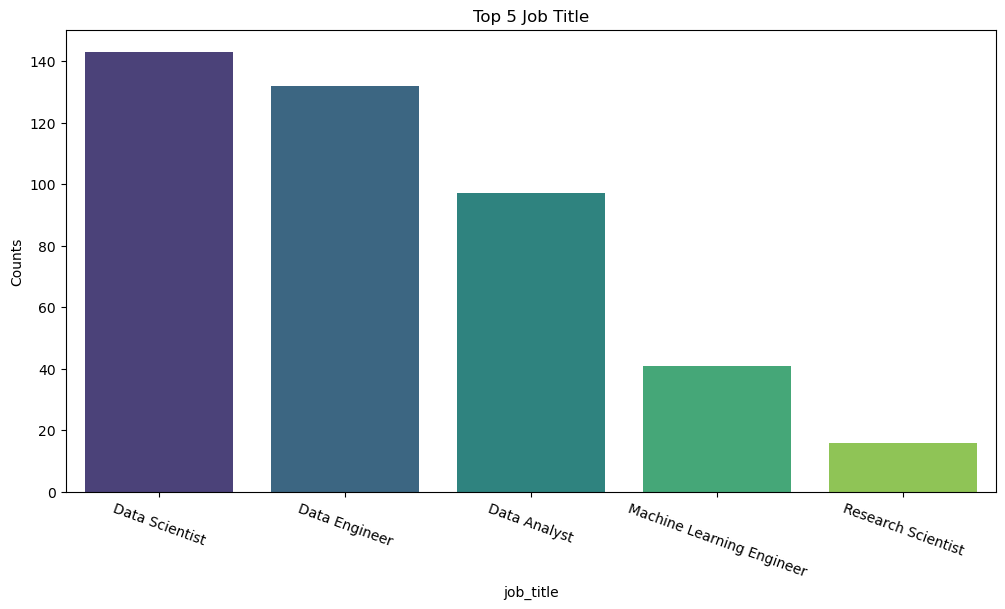

In [34]:
plt.figure(figsize=(12,6))
plt.bar(x=df4.index,height=df4.values)
sns.barplot(x=df4.index,y=df4.values,palette='viridis')
plt.title('Top 5 Job Title')
plt.ylabel('Counts')
plt.xticks(rotation=-20)
plt.show()

In [36]:
df5=df[['salary_in_usd','company_size']]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [37]:
S=df5[df5['company_size']=='S']
S

,salary_in_usd,company_size
1,260000,S
3,20000,S
6,190000,S
9,125000,S
10,51321,S
...,...,...
510,150000,S
512,65000,S
513,71444,S
515,48000,S


In [39]:
M=df5[df5['company_size']=='M']
M

,salary_in_usd,company_size
2,109024,M
12,39916,M
18,5707,M
19,56000,M
20,43331,M
...,...,...
601,52000,M
602,154000,M
603,126000,M
604,129000,M


In [40]:
L=df5[df5['company_size']=='L']
L

,salary_in_usd,company_size
0,79833,L
4,150000,L
5,72000,L
7,35735,L
8,135000,L
...,...,...
524,135000,L
525,177000,L
550,205300,L
551,140400,L


In [45]:
S=df5[df5['company_size']=='S']
M=df5[df5['company_size']=='M']
L=df5[df5['company_size']=='L']

labels=['Small','Medium','Large']
sal_mean =[S['salary_in_usd'].mean(),M['salary_in_usd'].mean(),L['salary_in_usd'].mean()]


In [46]:
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [48]:
label_change=np.round([x/1000 for x in sal_mean],2)
label_change=list(map(str,label_change))
label_change=[x+'K' for x in label_change]
label_change

['77.63K', '116.91K', '119.24K']

Text(0, 0.5, 'Salary in Usd')

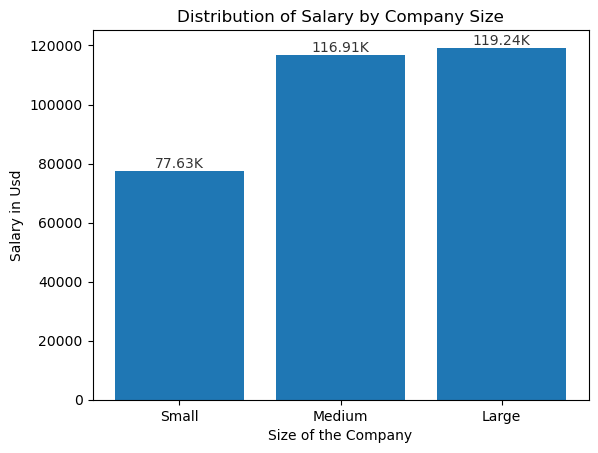

In [51]:
z=plt.bar(labels,sal_mean)
plt.bar_label(z,label_change,alpha=0.8)
plt.title('Distribution of Salary by Company Size')
plt.xlabel('Size of the Company')
plt.ylabel('Salary in Usd')

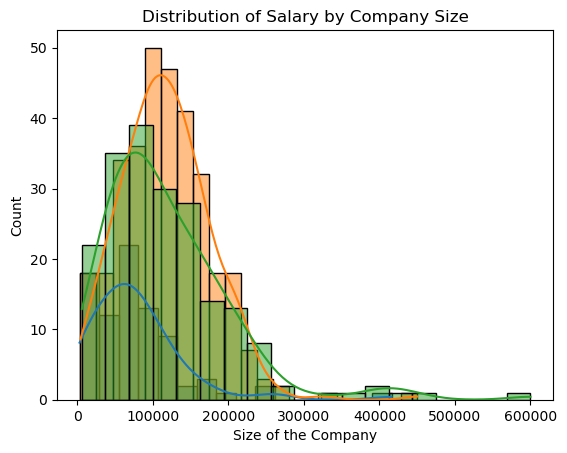

In [55]:
sns.histplot(S['salary_in_usd'],label='Small',kde=True)
sns.histplot(M['salary_in_usd'],label='Medium',kde=True)
sns.histplot(L['salary_in_usd'],label='Large',kde=True)

plt.title('Distribution of Salary by Company Size')
plt.xlabel('Size of the Company')
plt.show()

In [68]:
df6=df.experience_level.value_counts()
df6

experience_level
Seniors        280
Middle         213
Entry-Level     88
Executive       26
Name: count, dtype: int64

In [69]:
df6.index.to_list()

['Seniors', 'Middle', 'Entry-Level', 'Executive']

In [ ]:
df['experience_level'].replace('SE','Senior',inplace=True)


In [70]:
exp_map={
    'SE':'Seniors',
    'MI':'Middle',
    'EN':'Entry-Level',
    'EX':'Executive'
}

In [71]:
df['experience_level'].replace(exp_map ,inplace=True)


In [72]:
labels=df6.index.to_list()
labels

['Seniors', 'Middle', 'Entry-Level', 'Executive']

In [74]:
values=df6.values
values

array([280, 213,  88,  26], dtype=int64)

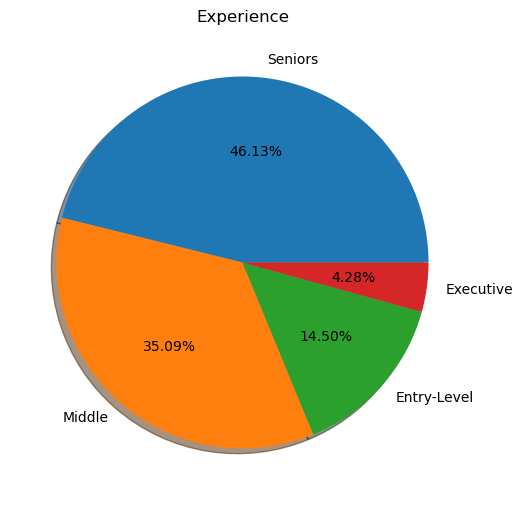

In [76]:
plt.figure(figsize=(6,12))
plt.pie(x=values,labels=labels,autopct='%1.2f%%',shadow=True)
plt.title('Experience')
plt.show()